In [89]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [90]:
#reading whale returns
whale_returns_csv = Path("../Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns_csv, index_col = "Date", parse_dates=True, infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [91]:
#count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [92]:
#drop nulls
whale_df.dropna(inplace = True)

In [93]:
#drop nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [94]:
#reading algo returns
algo_returns_csv = Path("../Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv, index_col = "Date", parse_dates=True, infer_datetime_format=True)
algo_df.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [95]:
#count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [96]:
# drop nulls
algo_df.dropna(inplace = True)

In [97]:
#drop nulls
algo_df.isnull() .sum()

Algo 1    0
Algo 2    0
dtype: int64

In [98]:
#reading sp closing prices
sp500_history_csv = Path("../Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_history_csv, index_col = "Date", parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [99]:
#checking data types
sp500_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
Close    1649 non-null object
dtypes: object(1)
memory usage: 25.8+ KB


In [100]:
sp500_df.dtypes

Close    object
dtype: object

In [101]:
sp500_df.count() 

Close    1649
dtype: int64

In [102]:
#fix data types
sp500_df["Close"] = sp500_df["Close"].str.replace("$","").astype("float")
sp500_df.info()
sp500_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
Close    1649 non-null float64
dtypes: float64(1)
memory usage: 25.8 KB


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [103]:
#calculate daily returns
sp500_df= (sp500_df - sp500_df.shift(1)) / sp500_df.shift(1)
sp500_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [104]:
#drop nulls
sp500_df = sp500_df.dropna()
sp500_df.isnull().sum()


Close    0
dtype: int64

In [105]:
#rename
sp500_df = sp500_df.rename(columns={
     "Close":"SP500"
 })
sp500_df.head()

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [106]:
#concat data frames
All_returns = pd.concat([whale_df, algo_df, sp500_df], axis="columns", join="inner")
All_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


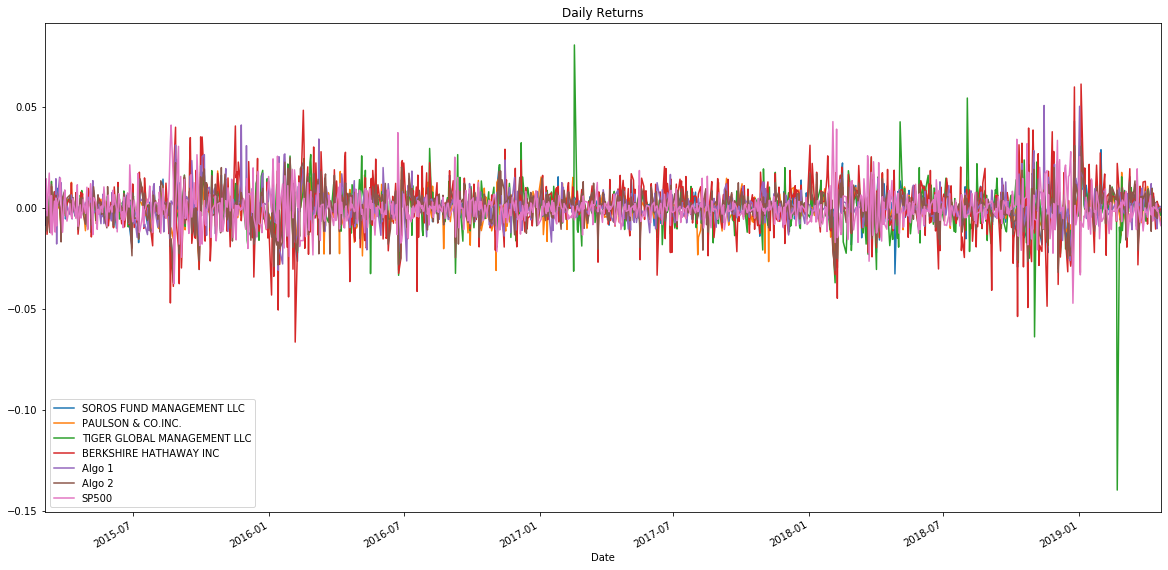

In [107]:
#plot daily returns
All_returns.plot(figsize=(20,10), title="Daily Returns")

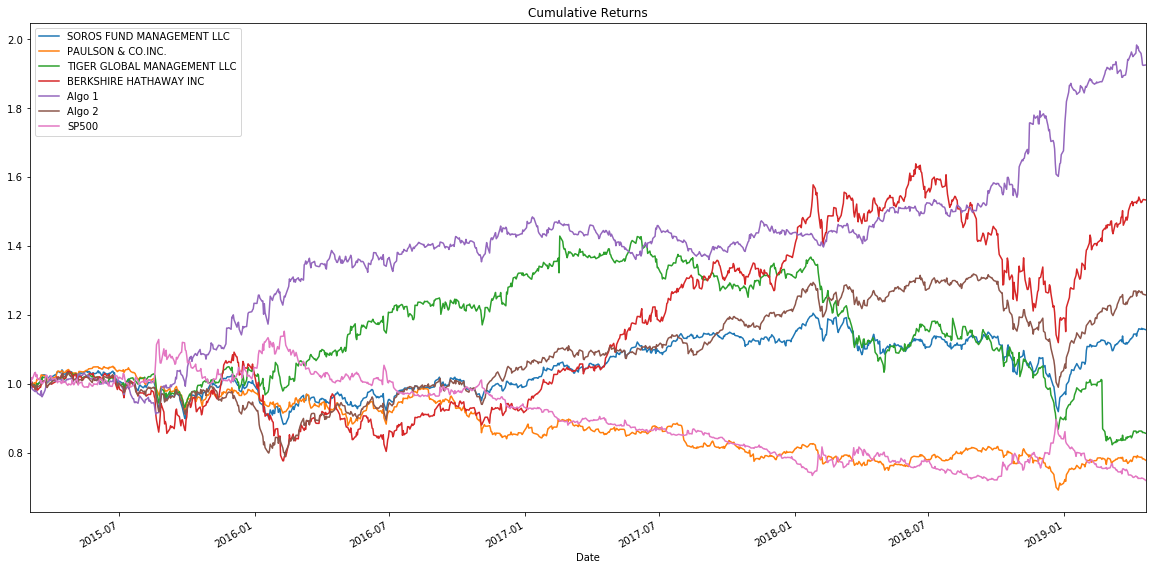

In [108]:
#plot cumulative return
cumulative_returns = (1 + All_returns).cumprod() 
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns")

In [109]:
#calculate by year
cumulative_returns_by_year = All_returns.groupby(All_returns.index.year).apply(lambda x: (1+x).cumprod() -1)
annual_returns_by_year =cumulative_returns_by_year.groupby(cumulative_returns_by_year.index.year).last()
annual_returns_by_year.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015,-0.003019,-0.023685,0.027644,0.034440,0.233385,-0.065759,0.047261
2016,-0.006991,-0.119136,0.278194,-0.114539,0.169350,0.113744,-0.108587
2017,0.144073,-0.069746,-0.000498,0.491562,-0.003228,0.162514,-0.162467
2018,-0.143357,-0.111315,-0.317783,-0.128091,0.165843,-0.141432,0.074015
2019,0.191705,0.092795,-0.044675,0.286969,0.148628,0.210516,-0.144409


In [110]:
#top portfolio returns
top_returns = annual_returns_by_year.loc[2017].sort_values(ascending = False)
top_returns

BERKSHIRE HATHAWAY INC         0.491562
Algo 2                         0.162514
SOROS FUND MANAGEMENT LLC      0.144073
TIGER GLOBAL MANAGEMENT LLC   -0.000498
Algo 1                        -0.003228
PAULSON & CO.INC.             -0.069746
SP500                         -0.162467
Name: 2017, dtype: float64

In [111]:
#return by month
annual_returns_by_month = cumulative_returns_by_year.groupby([cumulative_returns_by_year.index.year,cumulative_returns_by_year.index.month]).last()
annual_returns_by_month.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date Date                                                  
2015 3                      0.017207            0.011306   
     4                      0.020510            0.028373   
     5                      0.028771            0.048732   
     6                      0.007833            0.036748   
     7                     -0.007062            0.017783   

           TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date Date                                                                  
2015 3                        0.009419                0.002310  0.012788   
     4                        0.019890                0.014265  0.005529   
     5                        0.018452                0.015281  0.015020   
     6                       -0.005113               -0.005223  0.011742   
     7                        0.014955               -0.026778 -0.040424   

             Algo 2     SP500  
Date Date                      
2015 3    -0.000962  0.023348  
     4     0.008649 -0.000242  
     5     0.009577 -0.001871  
     6    -0.000518  0.014614  
     7    -0.017092  0.004642

In [112]:
#top portfolio returns for december 2018
annual_returns_by_month.loc[2018,12.].sort_values(ascending = False)

Algo 1                         0.165843
SP500                          0.074015
PAULSON & CO.INC.             -0.111315
BERKSHIRE HATHAWAY INC        -0.128091
Algo 2                        -0.141432
SOROS FUND MANAGEMENT LLC     -0.143357
TIGER GLOBAL MANAGEMENT LLC   -0.317783
Name: (2018, 12), dtype: float64

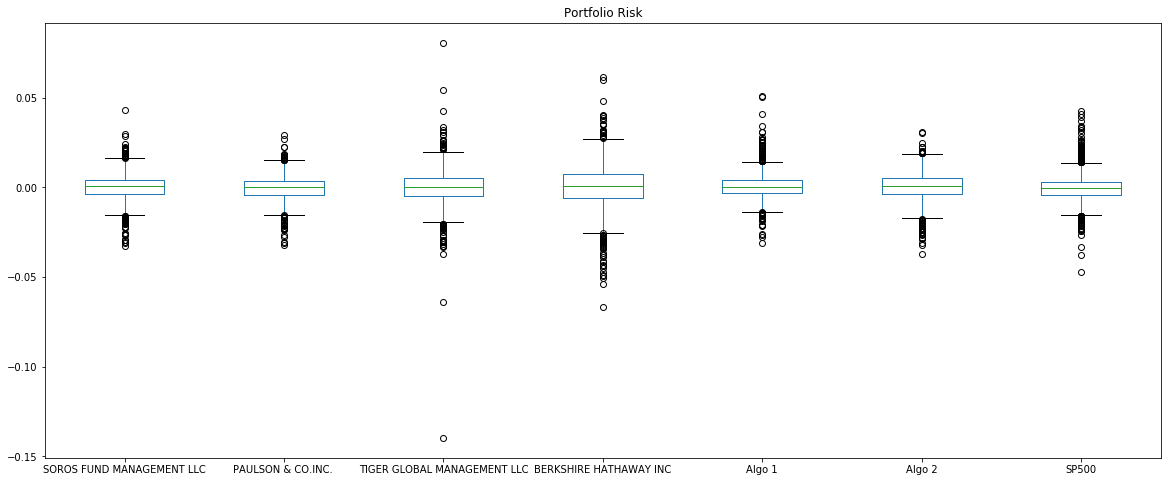

In [113]:
# box plot to visually show risk
All_returns.plot.box(figsize=(20,8), title="Portfolio Risk")

In [114]:
#Daily Std Deviation calculte the standard Deviation. which portfolios are riskier than the S&P500?
daily_std = All_returns.std()
print(daily_std)


SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64


In [115]:
#Determin which portfolios are riskier than the s&P500
riskier = All_returns["SP500"].std()
All_returns.std() > riskier


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP500                          False
dtype: bool

In [116]:
#calculate the annialized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500                          0.136313
dtype: float64

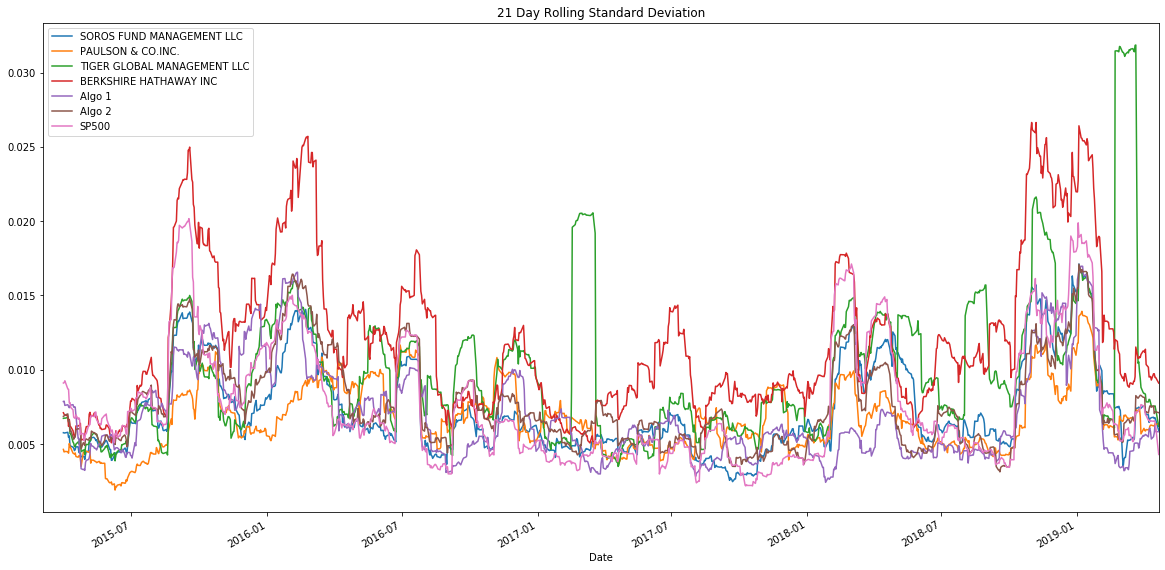

In [117]:
#calculate and plat the rolling std for s&p500 using 21 day windo

All_returns.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


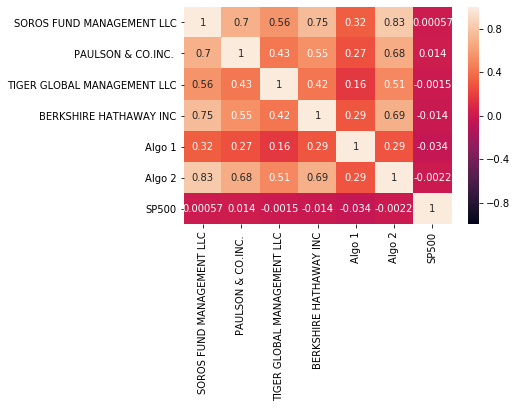

In [118]:
#correlation
import seaborn as sns
correlation = All_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1, annot= True)
correlation

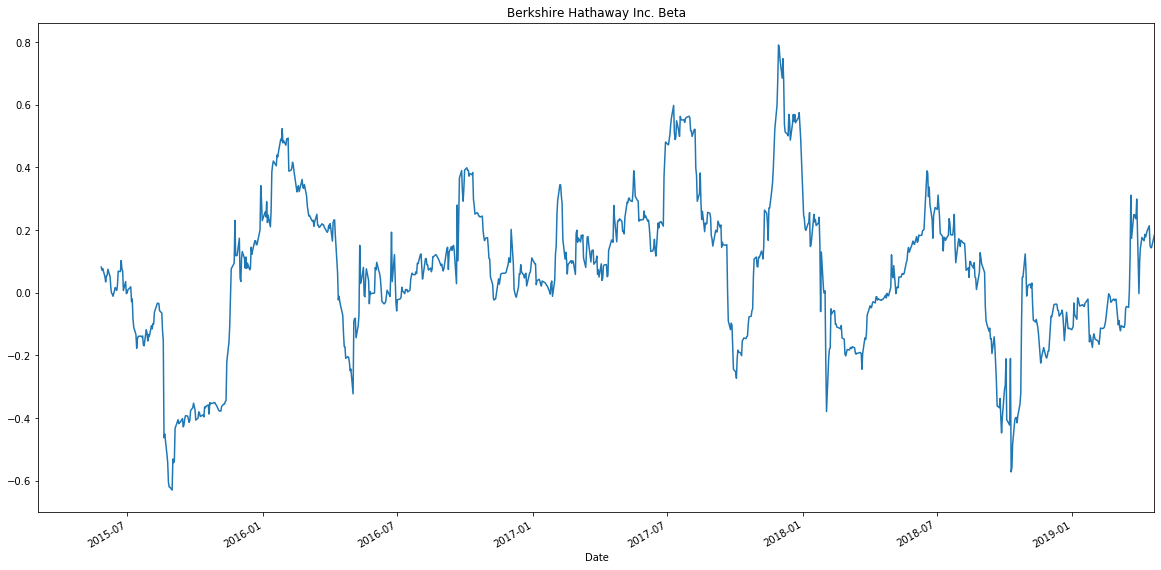

In [119]:
# calculate Beta for a single portfolio compared to the total market (SP500)
covariance = All_returns["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(All_returns["SP500"])
variance = All_returns["SP500"].rolling(60).var()
(covariance / variance).plot(figsize=(20, 10), title="Berkshire Hathaway Inc. Beta")

In [141]:
#Exponentially weighted averages

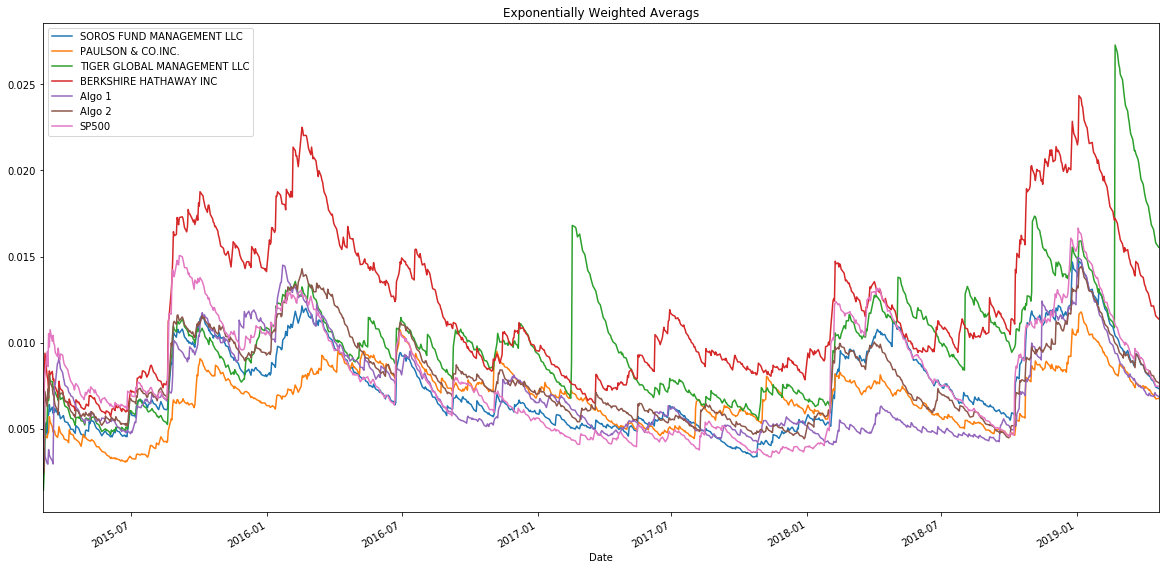

In [142]:
All_returns.ewm(halflife=21).std().plot(figsize=(20,10), title="Exponentially Weighted Averags")

In [143]:
#Sharp ratio
#Annualzied sharp ratios
sharp_ratios =(All_returns.mean()*252) / (All_returns.std() * np.sqrt(252))
sharp_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500                         -0.518582
dtype: float64

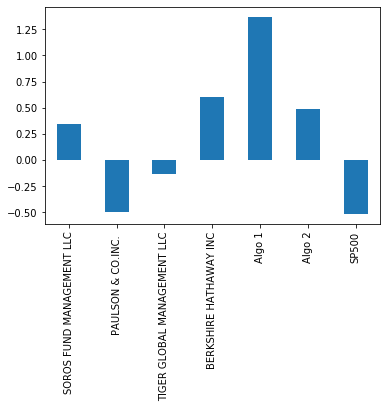

In [144]:
#visualize the shape the sharpe ratio as a bar plot
sharp_ratios.plot.bar()

In [145]:
#Portfolio Returns
#Read the first stock

In [146]:
#first stock
google_csv = Path("goog_historical.csv")
google_df = pd.read_csv(google_csv, index_col = "Trade DATE", parse_dates=True, infer_datetime_format=True)
google_df.sort_index(inplace=True, ascending=True)
google_df = google_df.rename(columns={
     "NOCP":"GOOG"

 })
google_df = google_df.drop(columns=["Symbol"])
google_df.head()


,GOOG
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [147]:
#second stock
appl_csv = Path("aapl_historical-Copy1.csv")
appl_df = pd.read_csv(appl_csv, index_col = "Trade DATE", parse_dates=True, infer_datetime_format=True)
appl_df.sort_index(inplace=True, ascending=True)
appl_df = appl_df.rename(columns={
     "NOCP":"AAPL"
 })
appl_df = appl_df.drop(columns=["Symbol"])
appl_df.head()

,AAPL
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [148]:
#third stock
cost_csv = Path("cost_historical.csv")
cost_df = pd.read_csv(cost_csv, index_col = "Trade DATE", parse_dates=True, infer_datetime_format=True)
cost_df.sort_index(inplace=True, ascending=True)
cost_df = cost_df.rename(columns={
     "NOCP":"COST"
 })
cost_df = cost_df.drop(columns=["Symbol"])
cost_df.head()

,COST
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [149]:
# Concatenate all stocks into a single DataFrame
All_stocks = pd.concat([google_df, appl_df, cost_df], axis="columns", join="inner")
All_stocks.head()


,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [150]:
# Reset the index
                           #Done

In [151]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
                                #Done

In [152]:
# Drop Nulls
All_stocks = All_stocks.dropna()
All_stocks.isnull().sum()
All_stocks.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [153]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
weighted_returns = All_stocks.pct_change()
portfolio_returns = weighted_returns.dot(weights)
portfolio_returns = portfolio_returns.dropna()
portfolio_returns.isnull().sum()
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

In [168]:
portfolio_returns
portfolio_returns = portfolio_returns.rename(columns={
     "Trade DATE":"COST"
 })
portfolio_returns.head()



Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

In [173]:
# Join your portfolio returns to the dataframe that contains all of the portfolio returns
Joined_portfolio = pd.concat([portfolio_returns, whale_df, algo_df, sp500_df], axis="columns", join="inner")
Joined_portfolio = Joined_portfolio.rename(columns={
     0:"Custom"
 })
Joined_portfolio.head()

#Note: "0 column should be Custom couldnt figure out how to change it to custome tried multiple methods"


,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333


In [178]:
# Only compare dates where the new, custom portfolio has dates
new_total = Joined_portfolio.dropna()#(inplace=True)


In [179]:
#Risk.... re-run the performance and risk analysis with your portfolio to see how it compares to the others calculated standard deviation
new_total.std() * np.sqrt(252)

Custom                         0.211627
SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
SP500                          0.152469
dtype: float64

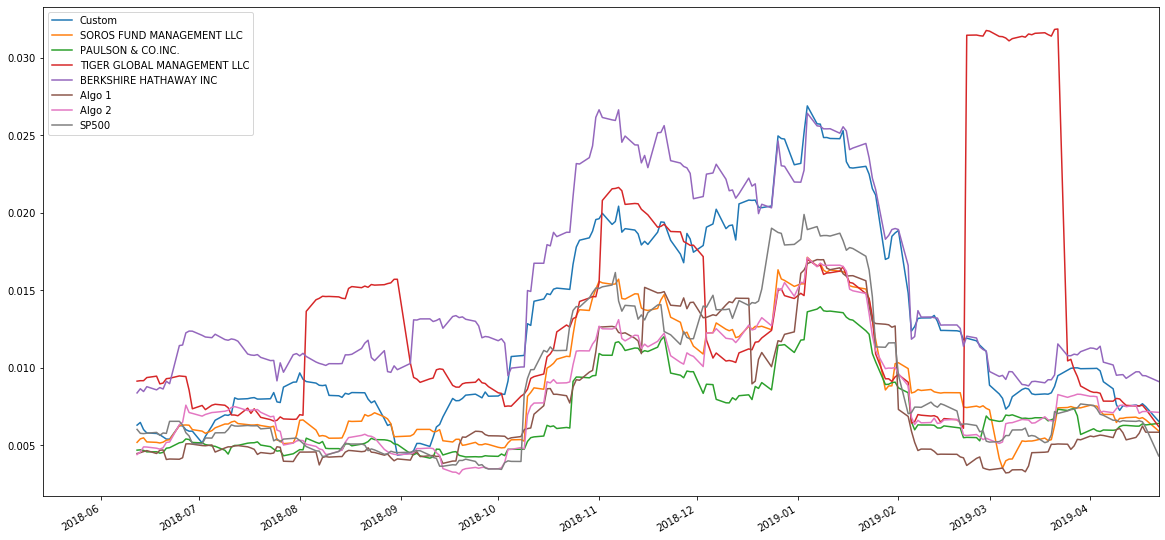

In [180]:
#rolling
new_total.rolling(window=21).std().plot(figsize=(20,10))

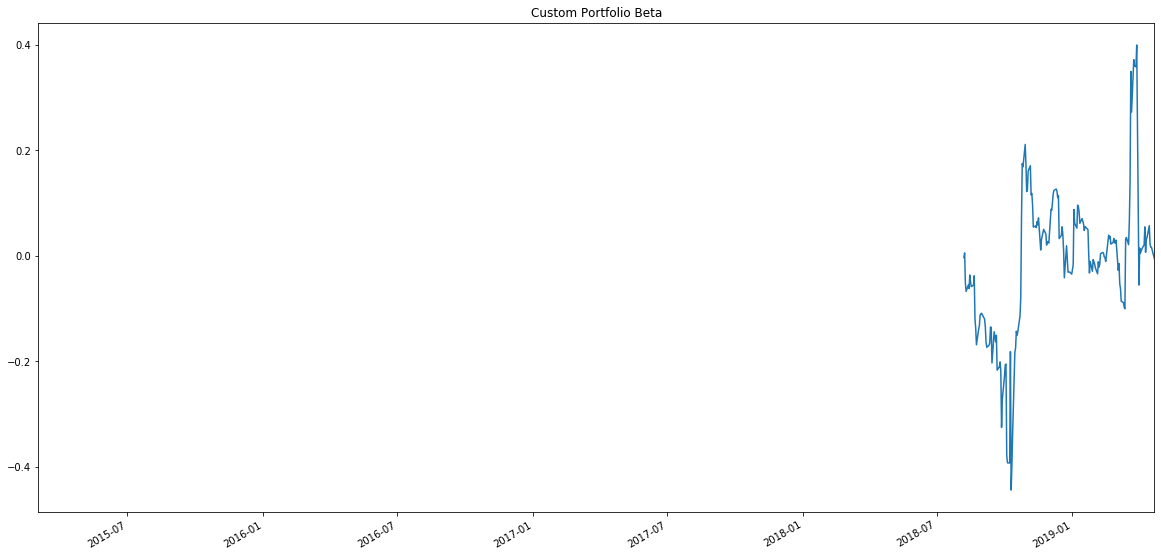

In [181]:
#Beta
covariance = new_total["Custom"].rolling(window=60).cov(All_returns["SP500"])
variance = new_total["SP500"].rolling(60).var()
(covariance / variance).plot(figsize=(20, 10), title="Custom Portfolio Beta")



In [182]:
#annualized sharp ratio
sharp_ratios = (new_total.mean() * 252)/ (new_total.std() * np.sqrt (252))
sharp_ratios

Custom                         0.876152
SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
SP500                         -0.427676
dtype: float64

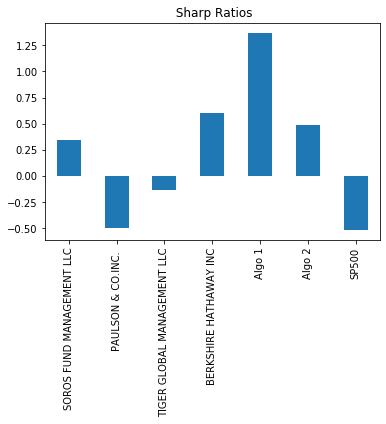

In [161]:
#visualize the sharp ratio as a bar plot
sharp_ratios.plot.bar(title=" Sharp Ratios")

In [183]:
# include correlation analysis to determine which stocks (if any) are correlated
df = new_total.corr()
df.style.background_gradient(cmap="summer")

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Custom,1,0.732548,0.643828,0.390961,0.800558,0.260331,0.73902,0.00560346
SOROS FUND MANAGEMENT LLC,0.732548,1,0.791802,0.477844,0.816197,0.336909,0.862583,-0.0282556
PAULSON & CO.INC.,0.643828,0.791802,1,0.484869,0.65039,0.360727,0.783865,-0.0598624
TIGER GLOBAL MANAGEMENT LLC,0.390961,0.477844,0.484869,1,0.324306,0.113671,0.408402,0.00588055
BERKSHIRE HATHAWAY INC,0.800558,0.816197,0.65039,0.324306,1,0.325985,0.782054,-0.0388319
Algo 1,0.260331,0.336909,0.360727,0.113671,0.325985,1,0.364457,-0.054478
Algo 2,0.73902,0.862583,0.783865,0.408402,0.782054,0.364457,1,-0.0425404
SP500,0.00560346,-0.0282556,-0.0598624,0.00588055,-0.0388319,-0.054478,-0.0425404,1
